# Predicción con Modelo Estandar

Primero hacer una predicción usando el modelo en versión tensorflow estandar

In [1]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

2025-01-07 15:58:28.319366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736287108.331571   24923 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736287108.334884   24923 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 15:58:28.350147: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = keras.models.load_model('/home/maxkaizo/mlzoomcamp_cp1/models/bcd_xception_acc_0.980.weights.h5.keras')

I0000 00:00:1736287110.713243   24923 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
img = load_img('test_img_glioma.jpg', target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

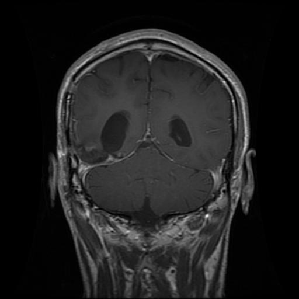

In [4]:
img

In [5]:
preds = model.predict(X)

I0000 00:00:1736287112.806137   25027 service.cc:148] XLA service 0x7f4234038dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736287112.806172   25027 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-01-07 15:58:32.828344: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736287113.094412   25027 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1736287117.146907   25027 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
preds

array([[3.1640951e-08, 7.9770884e-10, 9.9995077e-01, 3.3655159e-08,
        9.5961286e-07, 8.0101046e-08, 4.8204860e-05]], dtype=float32)

In [7]:
classes = [
    'ct_healthy',
    'ct_tumor',
    'mri_glioma',
    'mri_healthy',
    'mri_meningioma',
    'mri_pituitary',
    'mri_tumor'
]

In [8]:
dict(zip(classes, preds[0].round(5)))

{'ct_healthy': np.float32(0.0),
 'ct_tumor': np.float32(0.0),
 'mri_glioma': np.float32(0.99995),
 'mri_healthy': np.float32(0.0),
 'mri_meningioma': np.float32(0.0),
 'mri_pituitary': np.float32(0.0),
 'mri_tumor': np.float32(5e-05)}

# Convert to tf_lite

In [9]:
import tensorflow as tf

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpt7ywyt7q/assets


INFO:tensorflow:Assets written to: /tmp/tmpt7ywyt7q/assets


Saved artifact at '/tmp/tmpt7ywyt7q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  139926177223248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177226128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177226320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177226512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177224976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177226704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177225552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177227472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177227856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139926177225936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1399261772284

W0000 00:00:1736287122.068443   24923 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1736287122.068489   24923 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-07 15:58:42.068828: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpt7ywyt7q
2025-01-07 15:58:42.075975: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-07 15:58:42.076001: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpt7ywyt7q
I0000 00:00:1736287122.164611   24923 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-01-07 15:58:42.177706: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-07 15:58:42.696166: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpt7ywyt7q
2025-01-07 15:58:42.801522: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [11]:
with open('bcd_xception.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

# Use lite model

In [12]:
import tensorflow.lite as tflite

In [13]:
interpreter = tflite.Interpreter(model_path='bcd_xception.tflite')
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [14]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [15]:
interpreter.get_input_details()

[{'name': 'serving_default_input_layer_1:0',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [16]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [17]:
dict(zip(classes, preds[0].round(5)))

{'ct_healthy': np.float32(0.0),
 'ct_tumor': np.float32(0.0),
 'mri_glioma': np.float32(0.99995),
 'mri_healthy': np.float32(0.0),
 'mri_meningioma': np.float32(0.0),
 'mri_pituitary': np.float32(0.0),
 'mri_tumor': np.float32(5e-05)}